# **Gaussian Naive Bayes Classification**

Naive Bayes classification, a probabilistic algorithm based on Bayes' theorem, categorizes data by calculating the probability of class membership given features, assuming feature independence ("naive" assumption).

It utilizes different distributions—Gaussian for continuous, Multinomial for discrete, and Bernoulli for binary features

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df=pd.read_csv('/content/drive/MyDrive/datasets/ml/cricket.csv')
df

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY CRICKET
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [100]:
df.value_counts()

OUTLOOK   TEMPERATURE  HUMIDITY  WINDY  PLAY CRICKET
Overcast  Cool         Normal    True   Yes             1
          Hot          High      False  Yes             1
                       Normal    False  Yes             1
          Mild         High      True   Yes             1
Rainy     Cool         Normal    False  Yes             1
          Hot          High      False  No              1
                                 True   No              1
          Mild         High      False  No              1
                       Normal    True   Yes             1
Sunny     Cool         Normal    False  Yes             1
                                 True   No              1
          Mild         High      False  Yes             1
                                 True   No              1
                       Normal    False  Yes             1
Name: count, dtype: int64

In [101]:
def outlook(x):
  if x=="Rainy":
    return 0
  if x=="Sunny":
    return 1
  if x=="Overcast":
    return 2

def temperature(x):
  if x=="Hot":
    return 0
  if x=="Mild":
    return 1
  if x=="Cool":
    return 2

def humidity(x):
  if x=="High":
    return 0
  if x=="Normal":
    return 1

def wind(x):
  if x==False:
    return 0
  if x==True:
    return 1

def play(x):
  if x=="No":
    return 0
  if x=="Yes":
    return 1

In [102]:
df["OUTLOOK"]=df["OUTLOOK"].apply(outlook)
df["TEMPERATURE"]=df["TEMPERATURE"].apply(temperature)
df["HUMIDITY"]=df["HUMIDITY"].apply(humidity)
df["WINDY"]=df["WINDY"].apply(wind)
df["PLAY CRICKET"]=df["PLAY CRICKET"].apply(play)

In [103]:
df

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY CRICKET
0,0,0,0,0,0
1,0,0,0,1,0
2,2,0,0,0,1
3,1,1,0,0,1
4,1,2,1,0,1
5,1,2,1,1,0
6,2,2,1,1,1
7,0,1,0,0,0
8,0,2,1,0,1
9,1,1,1,0,1


In [104]:
x=df.drop("PLAY CRICKET",axis=1)
y=df["PLAY CRICKET"]

In [105]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [106]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB()

In [107]:
nb.score(xtrain,ytrain)

0.8888888888888888

In [108]:
nb.score(xtest,ytest)

0.8

In [109]:
ypred=nb.predict(xtest)

In [110]:
from sklearn import metrics
metrics.confusion_matrix(ytest,ypred)

array([[1, 0],
       [1, 3]])

In [111]:
metrics.accuracy_score(ytest,ypred)

0.8

In [112]:
nb.predict([[2,1,0,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [113]:
nb.predict([[2,2,1,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

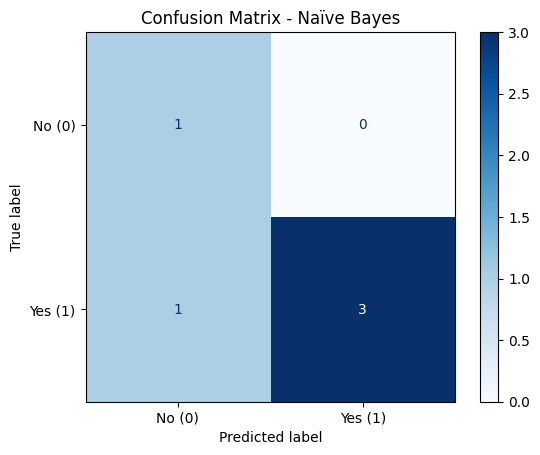

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No (0)", "Yes (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()
